Connected to venv (Python 3.11.5)

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [2]:
# train_dir = "./FaceRecognition-tfloading/train/"
# val_dir   = "./FaceRecognition-tfloading/validation/"

train_dir = "./custom_dataset-1/train/"
val_dir   = "./custom_dataset-1/validation/"

train_file_names = os.listdir(train_dir)
val_file_names = os.listdir(val_dir)

print("Number of training files: ", len(train_file_names))
print("Number of validation files: ", len(val_file_names))

Number of training files:  48
Number of validation files:  14


In [3]:
train_image_paths = []
train_label_paths = []
for i in range(len(train_file_names)):
    if train_file_names[i].endswith(".jpg"):
        train_image_paths.append(train_file_names[i])
    elif train_file_names[i].endswith(".txt"):
        train_label_paths.append(train_file_names[i])

val_image_paths = []
val_label_paths = []
for i in range(len(val_file_names)):
    if val_file_names[i].endswith(".jpg"):
        val_image_paths.append(val_file_names[i])
    elif val_file_names[i].endswith(".txt"):
        val_label_paths.append(val_file_names[i])

print("Number of training images: ", len(train_image_paths))
print("Number of validation images: ", len(val_image_paths))

Number of training images:  24
Number of validation images:  7


In [4]:
train_image_paths

['face_0.jpg',
 'face_1.jpg',
 'face_10.jpg',
 'face_12.jpg',
 'face_13.jpg',
 'face_14.jpg',
 'face_16.jpg',
 'face_17.jpg',
 'face_19.jpg',
 'face_2.jpg',
 'face_23.jpg',
 'face_24.jpg',
 'face_25.jpg',
 'face_26.jpg',
 'face_27.jpg',
 'face_29.jpg',
 'face_3.jpg',
 'face_30.jpg',
 'face_4.jpg',
 'face_5.jpg',
 'face_6.jpg',
 'face_7.jpg',
 'face_8.jpg',
 'face_9.jpg']

In [5]:
FACTOR = 4
IMG_WIDTH = int(640/FACTOR)
IMG_HEIGHT = int(480/FACTOR)

In [6]:
import matplotlib.pyplot as plt

train_images = []
for i in range(len(train_image_paths)):
    image = plt.imread(train_dir + train_image_paths[i])
    image = image[::FACTOR, ::FACTOR]
    
    image = image / 255.0
    train_images.append(image)
    
val_images = []
for i in range(len(val_image_paths)):
    image = plt.imread(val_dir + val_image_paths[i])
    image = image[::FACTOR, ::FACTOR]

    image = image / 255.0
    val_images.append(image)
    
train_images = np.array(train_images)
val_images = np.array(val_images)

In [7]:
labels = []
for i in range(len(train_label_paths)):
    label = np.loadtxt(train_dir + train_label_paths[i])
    # remove the first element
    label = label[1:]
    labels.append(label)
    
labels = np.array(labels)

val_labels = []
for i in range(len(val_label_paths)):
    label = np.loadtxt(val_dir + val_label_paths[i])
    # remove the first element
    label = label[1:]
    val_labels.append(label)
    
val_labels = np.array(val_labels)

In [8]:
print("Shape of training images: ", train_images.shape)
print("Shape of training labels: ", labels.shape)
print("Shape of validation images: ", val_images.shape)
print("Shape of validation labels: ", val_labels.shape)

Shape of training images:  (24, 120, 160, 3)
Shape of training labels:  (24, 4)
Shape of validation images:  (7, 120, 160, 3)
Shape of validation labels:  (7, 4)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='linear', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [12]:
model.fit(train_images, labels, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0529 - accuracy: 0.0833
Epoch 2/1000
1/1 [==============================] - 0s 102ms/step - loss: 0.0224 - accuracy: 0.6667
Epoch 3/1000
1/1 [==============================] - 0s 103ms/step - loss: 0.0215 - accuracy: 0.6667
Epoch 4/1000
1/1 [==============================] - 0s 107ms/step - loss: 0.0207 - accuracy: 0.6667
Epoch 5/1000
1/1 [==============================] - 0s 106ms/step - loss: 0.0199 - accuracy: 0.6667
Epoch 6/1000
1/1 [==============================] - 0s 100ms/step - loss: 0.0194 - accuracy: 0.6667
Epoch 7/1000
1/1 [==============================] - 0s 104ms/step - loss: 0.0190 - accuracy: 0.6667
Epoch 8/1000
1/1 [==============================] - 0s 108ms/step - loss: 0.0187 - accuracy: 0.6667
Epoch 9/1000
1/1 [==============================] - 0s 105ms/step - loss: 0.0186 - accuracy: 0.6667
Epoch 10/1000
1/1 [==============================] - 0s 89ms/step - loss: 0.0186 - accuracy: 0.6667
Epo

In [13]:
model.save('model/1000epoch.keras')

In [14]:
# test
test_image = plt.imread(val_dir + val_image_paths[0])
test_image = test_image[::FACTOR, ::FACTOR]
test_image = test_image / 255.0
test_image = np.array([test_image])
test_image.shape


(1, 120, 160, 3)

In [15]:
test_label = np.loadtxt(val_dir + val_label_paths[0])
test_label = test_label[1:]
test_label = np.array([test_label])
test_label.shape

(1, 4)

In [16]:
model.predict(test_image)

1/1 [==============================] - 0s 172ms/step


array([[0.37318295, 0.43842447, 0.5431745 , 0.8041484 ]], dtype=float32)

In [17]:
model.evaluate(val_images, val_labels)

1/1 [==============================] - 0s 188ms/step - loss: 0.0137 - accuracy: 0.8571


[0.013662525452673435, 0.8571428656578064]

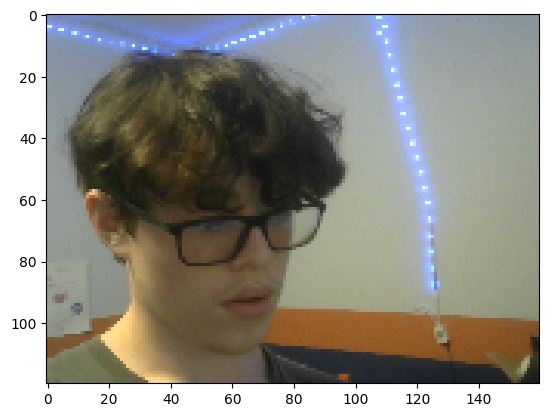

In [18]:
# display image
plt.imshow(test_image[0])

In [21]:
# display image with bounding box
test_label = model.predict(test_image)
test_label = test_label[0]
test_label

1/1 [==============================] - 0s 24ms/step


array([0.37318295, 0.43842447, 0.5431745 , 0.8041484 ], dtype=float32)